[Overview of Algorithms and Data Structures](algorithms_overview.ipynb) / Data Structures / Hash Tables

# Hash Tables

Hash tables data structure are made of two parts: 
* an **array** data structure - where data is actually stored
* a **hash function** - creates a *mapping* of the input data, or in other words, decides where and how to store and retrieve the data 

**Mapping** is a relationship between two sets of data. In hash tables values are mapped by keys, making a **key-value** pair (k, v). 

Hash function is what defines how effective (or otherwise) your hash table is. Let's walk through an example. Since hash table holds an *array* inside, let's say we have an array of strings with the size of 12. 

Whenever we insert a new string, we delegate a *hash function* to do the job of deciding where to put it. Let's assume that our hash function takes the length of the string and divides it by the size of the table using the remainder as an index of the array (or **hash bucket**). 

In [8]:
def hash_function(array_size, string):
    return len(string) % array_size

hash_function(12, "No. I'm your father")

7

The hash function will take store the string at index `9`. Of course, this hash function are usually more complex internally and handle sorting more effectively.

In fact, if use a function like this, we would most surey run into a **collision**. Collision would occur when two elements are supposed to be inserted at the exact same hash bucket. 

In [9]:
hash_function(12, "Do. Or do not. There is no try.")

7

It's not big of a deal though. Collisions are normal, and all we need is a more elaborate hash function that is aware of collisions possibly happening and knows how to handle them. Here are some of the ways it can do that:
* **Linear probing** - when collision occurs, store data in the next hash bucket.
* **Chaining** - prevents collisions, allowing for storage of multiple items in one hash bucket by turning every ellement of the array into a [linked list](linked_lists.ipynb). 

Luckily, we don't have to implement own hashing function. In Python we have hash tables out of the box. They are called `dictionaries`. 

## Dictionaries in Python

In [7]:
dict = {
    "apple": 6.99,
    "banana": 3.59,
    "dragon fruit": 9.99,
}

# You can also use dict comprehension syntax to quicly create a dictionary
num_dict = {str(i):i for i in range(5)}
print(num_dict)

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4}


Dictionaries consist of key-value pairs with the following characteristics:

* Keys hashable (generated by hashing function) 
* Hashing function generates unique result for each unique value
* Even though, as mentioned earlier, hash table uses an array data structure, the elements in a dictionary are not ordered by index

The use well-tested and finely tuned hash functions giving you all the benifits of **O(1) time complexity** for lookup, insert, update, and delete operations in the average case.

Dictionary type will suit to the majority of your needs to work with hash tables. There's also another a bit less popular way to deal with hashed data in Python

## collections.OrderedDict 

As the name suggests, **ordered dictionary** provides the same functionaly of the regular dict but with one perk on top. It can remember the insertion order of keys.

Unlike, regular dictionary. 

Which doesn't.

In [10]:
import collections

print('Regular dictionary:')
d = {}
d['a'] = 'A'
d['b'] = 'B'
d['c'] = 'C'
d['d'] = 'D'
d['e'] = 'E'

for k, v in d.items():
    print(k, v)

print('\nOrderedDict:')
d = collections.OrderedDict()
d['a'] = 'A'
d['b'] = 'B'
d['c'] = 'C'
d['d'] = 'D'
d['e'] = 'E'

for k, v in d.items():
    print(k, v)
 


Regular dictionary:
a A
b B
c C
d D
e E

OrderedDict:
a A
b B
c C
d D
e E


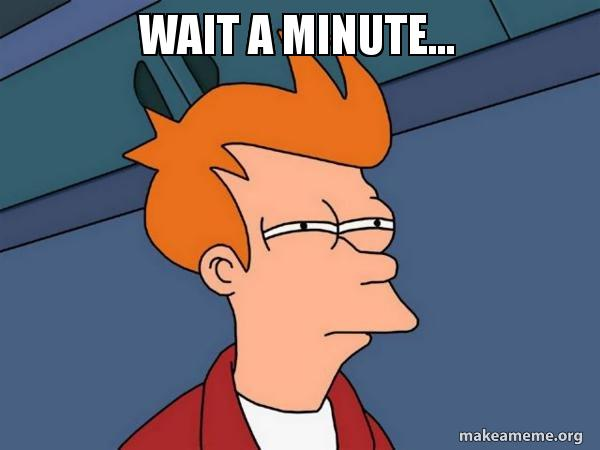

The output is the same!

Turns out, standard dictionaries also preserve the insertion order of keys. This is a side effect of the CPython implementation and not defined in the language spec, read more [here](https://mail.python.org/pipermail/python-dev/2016-September/146327.html). 
However, if your algorithm absolutely needs to have your keys ordered and you want to be explicit with your code intentions, you may use OrderedDict.

### Let's see how dict and OrderedDict compare in terms of speed

In [7]:
if __name__ == '__main__':
    import timeit
    import random
    import collections
    
    # std_dict = {a: a*a for a in range(1000000)}
    def create_std_dict():
        return {a: a*a for a in range(100)}
    
    def create_ord_dict():
        return collections.OrderedDict(((a, a*a) for a in range(100)))
    
    std_dict = create_std_dict()
    ord_dict = create_ord_dict()
    
    def traverse(dict):
        for i in range(100):
            dict[i]*2
            
    
    
    
    # timeit 
    print("Traverse standard dict", timeit.timeit("traverse(std_dict)", setup="from __main__ import traverse, std_dict"))
    print("Traverse ordered dict", timeit.timeit("traverse(ord_dict)", setup="from __main__ import traverse, ord_dict"))


Traverse standard dict 6.165011282049818
Traverse ordered dict 6.166406153846765


## Other Dictionary Types in Python

*  [collections.defaultdict](https://docs.python.org/3/library/collections.html#collections.defaultdict) – Return default values for missing keys
*  [collections.ChainMap](https://docs.python.org/3/library/collections.html#collections.ChainMap) – Search multiple dictionaries as a single mapping
*  [types.MappingProxyType](https://docs.python.org/3/library/types.html#types.MappingProxyType) – A wrapper for making read-only dictionaries